## Домашня работа 3.
## KNN. Решающие деревья.

Дедлайн 8 ноября в 21:00.



Максимальная оценка - 10 баллов.

Не списывайте 👒

Не бойтесь рисовать картинки и применять другие методы, даже если не просили 👒

In [47]:
print('Всем удачи!👒')
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
import mplcyberpunk
from pylab import rcParams


%matplotlib inline

Всем удачи!👒


**Задание 1 (3 балла)** Реализуйте свой собственный класс для KNN. Сделайте возможность выбора метрики расстояния: евклидова или манхэттанская.

**Важно:** если вам тяжело работать с классом, можете написать функцию или последовательность функций для реализации KNN. В этом случае вы можете получить не более **2 баллов** за задание. 

In [42]:
class KNNClassifier(BaseEstimator):
    def __init__(self, n_neighbors=5,
                 p=2):
        """
        n_neighbors : int, default=5
            Number of neighbors to use by default.

        p : int, default=2
            Power parameter for the Minkowski metric. When p = 1, this is
            equivalent to using manhattan_distance (l1), and euclidean_distance
            (l2) for p = 2.
        """
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X, y):
        """
        Fit the k-nearest neighbors classifier from the training dataset.

        Parameters
        ----------
        X : matrix of shape (n_samples, n_features)
            Training data.
        y : array of shape (n_samples,) 
            Target values.

        Returns
        -------
        self : KNeighborsClassifier
            The fitted k-nearest neighbors classifier.
        """
        self.matrix = np.hstack((X, y[:,None]))
        return self

    def predict(self, X):
        """
        Predict the class labels for the provided data.
        
        Parameters
        ----------
        X : matrix of shape (n_test_samples, n_features)
            Test samples.

        Returns
        -------
        y : array of shape (n_test_samples,) 
            Class labels for each data sample.
        """
        self.predictions = []
        for u in range(X.shape[0]):
            new_observation = np.tile(X[u], (self.matrix.shape[0], 1)) 
            #вытягиваем вектор одного наблюдения, чтобы посчитать все расстояния разом
            distance = np.sum(np.abs(new_observation - self.matrix[:, :-1])**self.p, axis=1)**(1/self.p)
            nearest_samples = distance.argsort()[:self.n_neighbors] 
            # нашли к ближайших соседей
            self.predictions.append(mode(self.matrix[:, -1][nearest_samples])[0][0])
        self.predictions = np.array(self.predictions)
        return self

**Задание 2 (2  балла)** 
Обучите свой KNN для предсказания наличия болезни сердца. Данные лежат [здесь](https://github.com/AsyaKarpova/ml_nes_2020/blob/master/homeworks/heart_hw3.csv).


Описание для любопытных  👒:

- age - age in years

- sex - (1 = male; 0 = female)

- cpchest - pain type

- trestbpsresting - blood pressure (in mm Hg on admission to the hospital)

- cholserum - cholestoral in mg/dl

- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg - resting electrocardiographic results

- thalach - maximum heart rate achieved

- exang - exercise induced angina (1 = yes; 0 = no)

- oldpeak - ST depression induced by exercise relative to rest

- slope - the slope of the peak exercise ST segment

- ca - number of major vessels (0-3) colored by flourosopy

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect




Поэкспериментируйте с различным сочетанием числа соседей и метрик расстояния. 
Оцените качество на кросс-валидации с помощью `sklearn.model_selection.cross_val_score`, в качестве метрики используйте `accuracy` (`scoring=accuracy`).

In [43]:
# как обычно делим на тестовую и трейновую выборки

data = pd.read_csv('heart_hw3.csv')
y = data.target
X = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
np.random.seed(6) # обучаем модель на нашем КНН

knn = KNNClassifier(n_neighbors = 21, p=1)
knn = knn.fit(X_train.values, y_train.values)
knn.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, knn.predictions))
print('Precision: ', precision_score(y_test, knn.predictions))
print('Recall: ', recall_score(y_test, knn.predictions))

Accuracy:  0.6593406593406593
Precision:  0.66
Recall:  0.7021276595744681


In [45]:
np.random.seed(6)
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 40, 2),
        'p': [1, 2, 3]}, cv=5)
grid_searcher.fit(X_train.values, y_train.values)
grid_searcher.best_params_

{'n_neighbors': 19, 'p': 1}

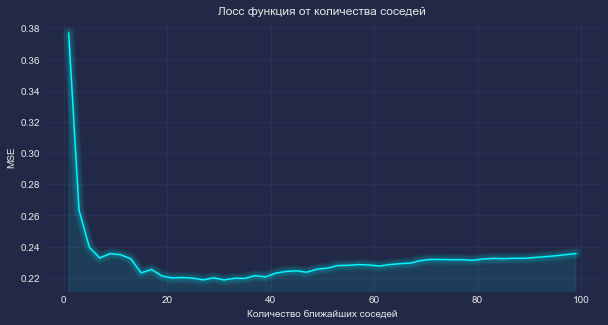

In [49]:
plt.style.use("cyberpunk")
rcParams['figure.figsize'] = 10, 5

neighbors = np.arange(1, 101, 2)
scores_uni = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores_uni.append(-cross_val_score(knn, X_train.values, y_train.values, scoring='neg_mean_squared_error').mean())

plt.plot(neighbors, scores_uni, label='uniform')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('MSE')
plt.title('Лосс функция от количества соседей')  
mplcyberpunk.add_glow_effects() 

**Задание 3 (2 балла)** На этих же данных обучите логистическую регрессию с дефолтными гиперпараметрами. Сравните качество. Ожидали ли вы такие результаты? 
Вспомнив пройденный материал (~включив воображение~), напишите несколько достоинств и недостатков KNN и логистической регресии.

In [50]:
np.random.seed(6)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
classifier.score(X_test, y_test) #качество явно лучше

0.8351648351648352

**KNN**:

Плюсы: нет трейнового периода, так как начальные данные - уже готовая модель, которую надо всего лишь запомнить. Из этого вытекает повышенная скорость обучения и возможность добавить новые данные в любой момент, ну и из вычислений только расстояния между точками - чаще всего манхэтенское или евклидово

Минусы: КНН очень чувствителен к шуму и особенно (!) к выбросам, плохо справляется с массивными датасетами и большим количеством размерностей (много считать, и зачастую эти вычисления бесполезны, так как не понятно, какой признак релевантен, а какой - нет, и все надо посчитать), и как показала практика, не очень точен в предсказаниях. При добавлении новых данных может сильно измениться.

**Логистическая регрессия**:

Плюсы: понятная и математически обоснованная модель, а при использовании стохастического градиентного спуска требует мало вычислений. При добавлении новых экземпляров модель изменится незначительно, можно использовать всякие фичи для того чтобы избежать переобучения модели, как l1 и l2 регуляризация. Плюсом - возможность посчитать вероятность принадлежности к тому или иному классу. Очень эффективна, когда в наборе данных есть функции, которые можно линейно разделить, а веса, получившиеся при обучении, можно интерпретировать как корреляцию между признаком и таргетным значением. Менее чувствителен к выбросам, чем КНН

Минусы: Очень легко переобучить модель, если не следить за регуляризацией и штрафом за большие веса. Плохо работает при линейно не сепарабельных данных. Логистическая регрессия требует умеренной мультиколлинеарности или отсутствия мультиколлинеарности между независимыми переменными. Это означает, что если две независимые переменные имеют высокую корреляцию, следует использовать только одну из них.

**Задание 4 (2 балла)** Для этой же задачи обучите решающее дерево с дефолтными гиперпараметрами. Затем попробуйте подобрать значения гиперпараметров с помощью `sklearn.model_selection.GridSearchCV`.  
Сравните качество с рассмотренными выше методами. Аналогично предыдущему заданию, приведите достоинства и недостатки метода. Поразмышляйте над влиянием гиперпараметров на качество обучения.

In [51]:
#сразу случайный лес
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 69)
rf.fit(X_train, y_train)
prediction_rf =  rf.predict(X_test)
rf.score(X_test, y_test)

0.8241758241758241

In [22]:
np.random.seed(6)
model_params = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 0.25, 0.5, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(X_train, y_train)

clf.best_params_

{'max_features': 0.5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [52]:
np.random.seed(6)

rf = RandomForestClassifier(max_features=0.5, min_samples_leaf=4, min_impurity_split=2, n_estimators=100, random_state = 1)
rf.fit(X_train, y_train)
prediction_rf =  rf.predict(X_test)
rf.score(X_test, y_test)

## модель слишком "хорошо" подобрала параметры на трейновом датасете, и уронила качество на тестовом :(

0.5164835164835165

**Решающие деревья:**

Плюсы: высокая точность за счет деления выборки на две части по наиболее релевантному признаку и с наименьшей дисперсией внутри групп. Может использоваться как для классификации, так и для регрессии (и с категориальными, и с непрерывными переменными), что говорит о его функциональности. Сравнительно мало подвержен шуму и выбросам, хорошо работает когда данные плохо разделяются линейно (в отличие от логистической регрессии)

Минусы: алгоритм требует гораздо большей вычислительной мощности и ресурсов. Более дительный период обучения. Высока вероятность переобучения при большой глубине дерева, как у меня и получилось в примере выше, возможно потому что выборка была небольшая

**Задание 5 (1 балл)** Нарисуйте ваше дерево с помощью `export_graphviz`. Или любого другого [способа](https://mljar.com/blog/visualize-decision-tree), позволяющего представлять работу деревьев 👒

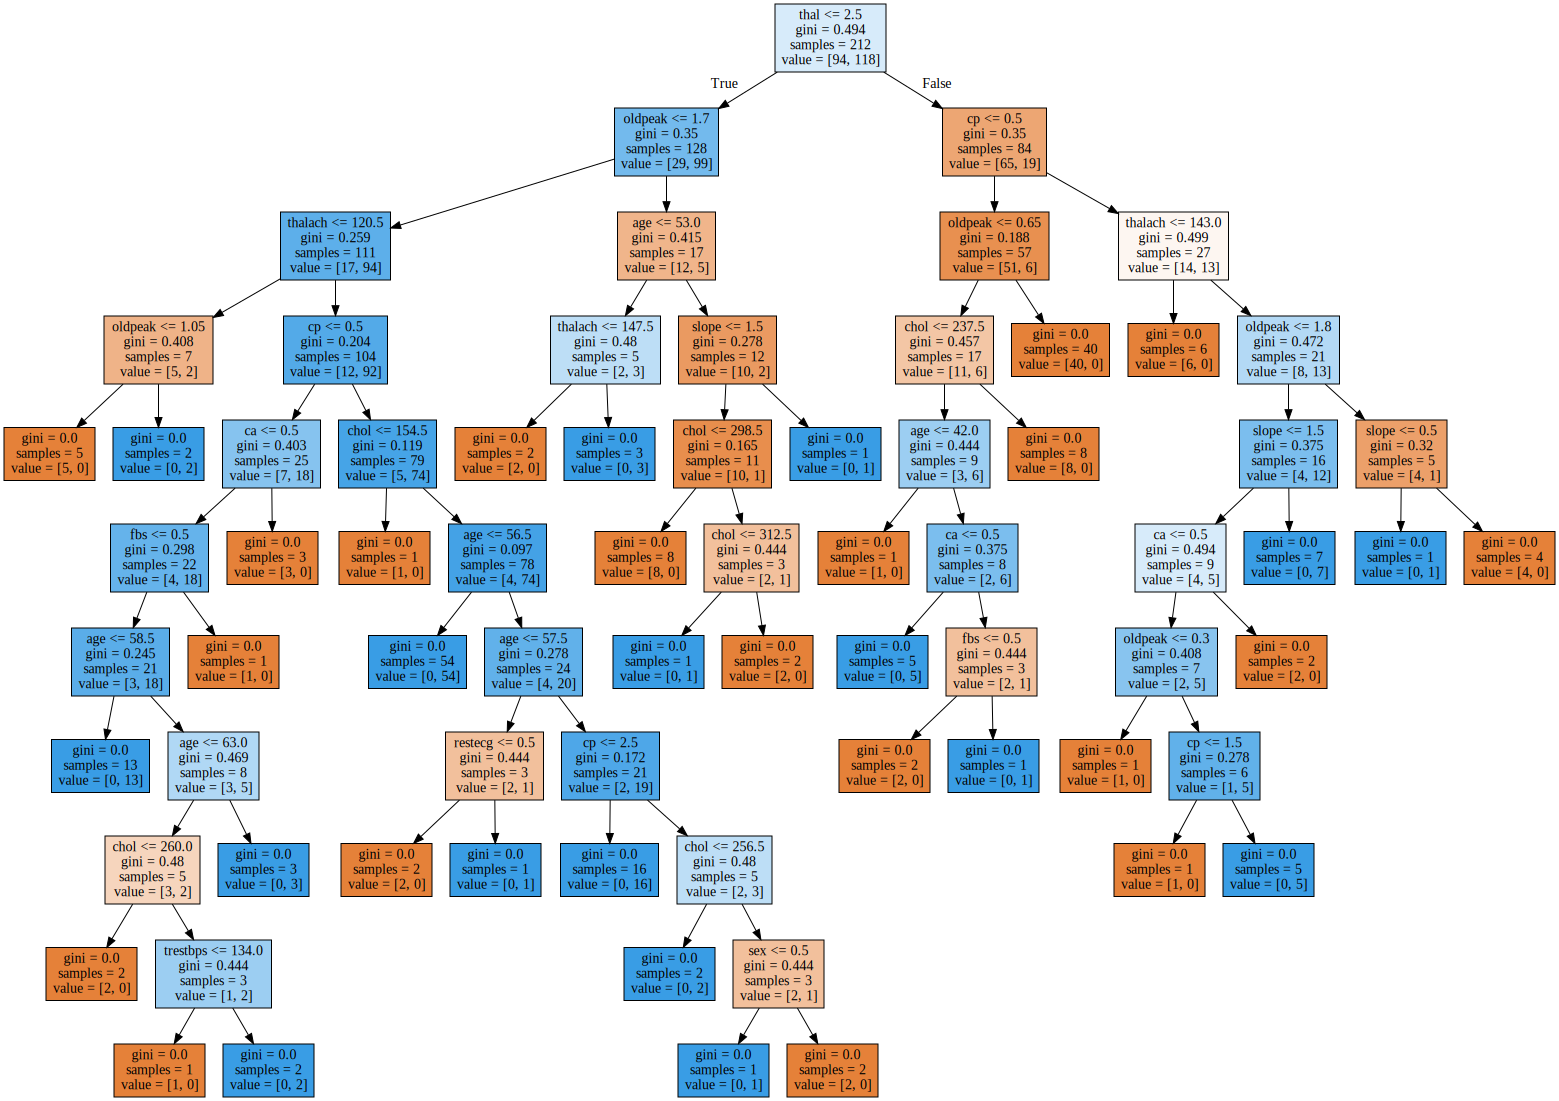

In [53]:
clf = tree.DecisionTreeClassifier()
model1 = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(model1, out_file=None, 
                                feature_names=X_train.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Задание 6 (0 баллов к домашке, 100 баллов к карме)** Порадуйте ассистента красивой картинкой дерева или леса 👒

In [54]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, X_train, y_train,
                feature_names=X_train.columns,
                class_names=list(y_train.unique()))
viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\nikul\\AppData\\Local\\Temp\\DTreeViz_572.svg', 'C:/Users/nikul/AppData/Local/Temp\\DTreeViz_572'], make sure the Graphviz executables are on your systems' PATH

**хотела порадовать картинкой, но винда почему-то не нашла пакеты графики которые нужны для визуализации дерева и выдает такую ошибку: ** failed to execute ['dot', '-Tsvg', '-o', ......], make sure the Graphviz executables are on your systems' PATH